In [3]:
import mguaJN
import numpy as np
import sklearn
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
import math
from sklearn.metrics import r2_score
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy import random
import scipy

In [1]:
from scipy.special import softmax

In [13]:
x = [15, 60, 15, 35]
x = np.array(x)
np.around(softmax(x), 2)

array([0., 1., 0., 0.])

https://rdkit.org/docs/GettingStartedInPython.html

https://sourceforge.net/p/rdkit/mailman/message/36802142/

http://rdkit.org/docs/source/rdkit.Chem.Descriptors.html

http://82.202.247.23:1780/datasets_hash023746yhdo3ytrbvjaehgfr/sutherland/

In [3]:
bzr = pd.read_csv('bzr/bzr_matrix_alphabet_NNdb*_UpTo2chains.csv', sep=',')
bzr_y = pd.read_csv('bzr/bzr_y.csv', sep=',')

In [7]:
bzr

,Br1s*C3a*,C1d*C2d*,C1s*C2s*,C1s*C3a*,C1s*C3d*,C1s*C3s*,C1s*C4s*,C1s*N2s*,C1s*N3a*,C1s*N3s*,...,N2d*N2w*,N2d*O1s*,N2s*O1s*,N3d*O1d*,N3d*O1s*,N3s*S4w*,O1d*S4w*,O1s*P4s*,O1s*S4w*,O2s*P4s*
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Для bzr нужно сделать так:

In [5]:
for i, elem in bzr_y['IC50_uM'].items():
    bzr_y['IC50_uM'][i] = float(elem.strip('[]').strip('()').split(', ')[0])

In [15]:
bzr_y.loc[bzr_y['IC50_uM'] > 10]

,IC50_uM
235,100
236,100
237,100
238,13.2
239,100
241,100
242,100
243,100
244,100
245,32


In [17]:
cv_per = 0.05

In [89]:
q=10
mgua_model = mguaJN.MGUA(Q=q, C=0.6, I=10)
cv_size = round(bzr.shape[0]*cv_per)
scores = []
scores_train = []
for i in range(bzr.shape[0]//cv_size):
    X_test = bzr.iloc[i*cv_size:(i+1)*cv_size]
    y_test = bzr_y.iloc[i*cv_size:(i+1)*cv_size]
    X_train = bzr.drop(np.arange(i*cv_size, (i+1)*cv_size))
    y_train = bzr_y.drop(np.arange(i*cv_size, (i+1)*cv_size))
    mgua_model.fit(X_train, y_train)
    res = np.array(mgua_model.predict(X_test))
    res_train = np.array(mgua_model.predict(X_train))
    res = res.reshape(len(mgua_model.buf_coef[0]), X_test.shape[0]).mean(axis=0)
    res_train = res_train.reshape(len(mgua_model.buf_coef[0]), X_train.shape[0]).mean(axis=0)
    scores.append(r2_score(y_test, res))
    scores_train.append(r2_score(y_train, res_train))
    


In [90]:
print(scores)
print(scores_train)

[-305380.47712895036, -2131.6426299599057, -4920.502146614928, -477.32633366006644, -64.96027606749438, -483.2184268255544, -1578801.9489953266, -7648.588558618685, -326.26478811147314, -3819.832108973568, -1177.610922278306, -0.0840450086944482, -0.21121828093551165, 0.10904428289227153, 0.10563763263701398, -0.008847710761695105, -1.6904090890389365, -0.2401166459820696, -51.845984581187594, -5.209895950612387]
[0.17693164391915295, 0.1816916943850605, 0.17509651824834827, 0.18348342777370008, 0.16122456075600655, 0.16386023773810687, 0.19093537781238534, 0.17959825434816135, 0.16512512233157117, 0.16749797108742226, 0.16853460261507625, 0.17193096308787792, 0.1154524685191175, 0.17826400459509084, 0.15154935592208052, 0.17157141483013683, 0.17549019973104452, 0.1825768913306809, 0.1665105251328094, 0.1652447506533128]


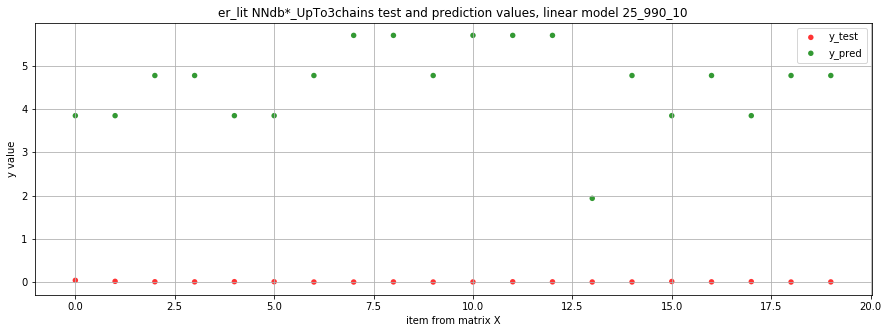

In [63]:
data = ((np.arange(y_test[:].shape[0]), y_test.to_numpy().reshape(-1)[:]), (np.arange(y_test[:].shape[0]), res.reshape(-1)[:]))
colors = ("red", "green")
groups = ("y_test", "y_pred")

# Create plot
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(5)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#         ax.vlines(x[0], x[1], y[1], color = 'r')

plt.title('er_lit NNdb*_UpTo3chains test and prediction values, linear model 25_990_10')
plt.ylabel("y value")
plt.xlabel("item from matrix X")
plt.grid()  
plt.legend(loc=0)
plt.show()

In [61]:
scores

[-305380.47712895036]

In [59]:
scores

[-305380.47712895036,
 -2131.6426299599057,
 -4920.502146614928,
 -477.32633366006644,
 -64.96027606749438,
 -483.2184268255544,
 -1578801.9489953266,
 -7648.588558618685,
 -326.26478811147314,
 -3819.832108973568,
 -1177.610922278306,
 -0.0840450086944482,
 -0.21121828093551165,
 0.10904428289227153,
 0.10563763263701398,
 -0.008847710761695105,
 -1.6904090890389365,
 -0.2401166459820696,
 -51.845984581187594,
 -5.209895950612387]

In [21]:
405//20

20

In [29]:
bzr.iloc[10:20]

,Br1s*C3a*,C1d*C2d*,C1s*C2s*,C1s*C3a*,C1s*C3d*,C1s*C3s*,C1s*C4s*,C1s*N2s*,C1s*N3a*,C1s*N3s*,...,N2d*N2w*,N2d*O1s*,N2s*O1s*,N3d*O1d*,N3d*O1s*,N3s*S4w*,O1d*S4w*,O1s*P4s*,O1s*S4w*,O2s*P4s*
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
np.arange(20, 40)

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])

In [40]:
bzr.drop(np.arange(2,7))

,Br1s*C3a*,C1d*C2d*,C1s*C2s*,C1s*C3a*,C1s*C3d*,C1s*C3s*,C1s*C4s*,C1s*N2s*,C1s*N3a*,C1s*N3s*,...,N2d*N2w*,N2d*O1s*,N2s*O1s*,N3d*O1d*,N3d*O1s*,N3s*S4w*,O1d*S4w*,O1s*P4s*,O1s*S4w*,O2s*P4s*
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


$X_i = Pred_i + a_i$ 

$S_i = Pred_i + j^{(i)}$

Причем $Sales_i = S_i \text{ if } X_i \geq S_i ; X_i \text{ if } X_i < S_i$

In [91]:
import rdkit